<a href="https://colab.research.google.com/github/rinkeshdas01/Bike-Rental-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/SeoulBikeData.csv'

In [ ]:
df=pd.read_csv(path, encoding= 'unicode_escape')

In [ ]:
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Understanding the dataset

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Let us see the number of observations where the rental service is not functional. Those observations are of no use to the model.

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
#Checking for bike rentals on non functioning day
df.groupby('Functioning Day',as_index=False)['Rented Bike Count'].mean()

,Functioning Day,Rented Bike Count
0,No,0.000000
1,Yes,729.156999


We see that no bikes are rented on non functioning day so the feature is of no use for the model. So we shall drop it.

In [ ]:
df=df[(df['Functioning Day']=='Yes')]
df.drop('Functioning Day',axis=1,inplace=True)

# Checking for null values

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
dtype: int64

Dew point temperature is related to temperature by the following relation:-

Td=T-((100-RH)/5)  where,

Td= Dew point Temperature

T= Observed Temperarure

RH=Relative Humidity


So we can introduce a new variable in order to reduce correlation.

In [ ]:
df['Average of temp and DP temp']=df[['Temperature(°C)','Dew point temperature(°C)']].mean(axis=1)

The variables Temperature and Dew Point Temperature are no longer required.

In [ ]:
#Dropping dew point temperature
df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

## EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5017d57fa0>,
      dtype=object)

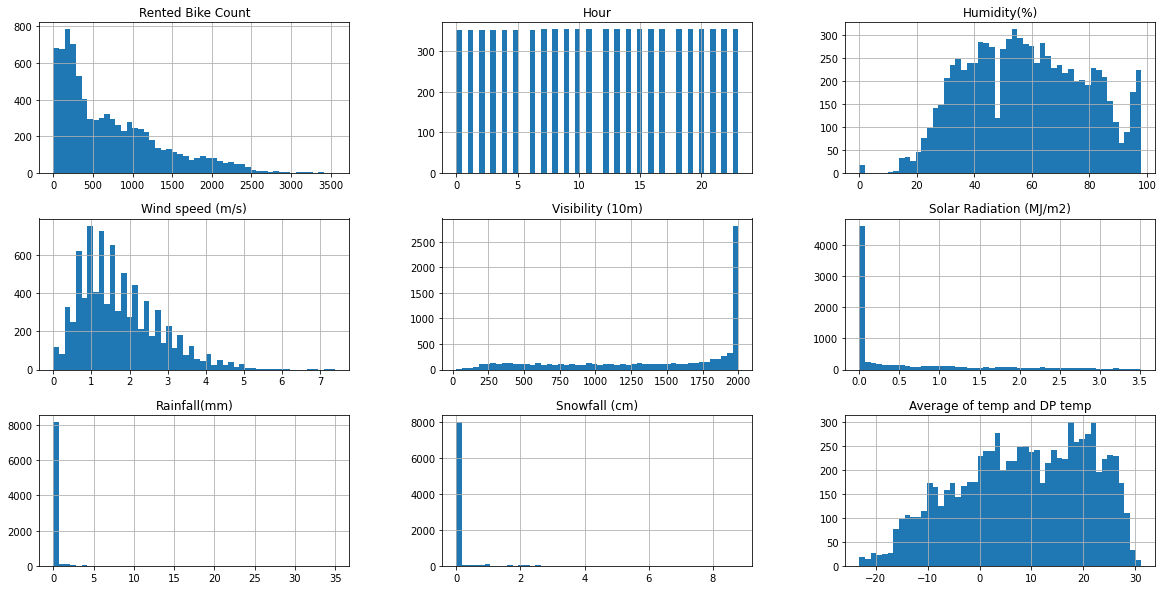

In [ ]:
df.hist(bins=50,figsize=(20,10))

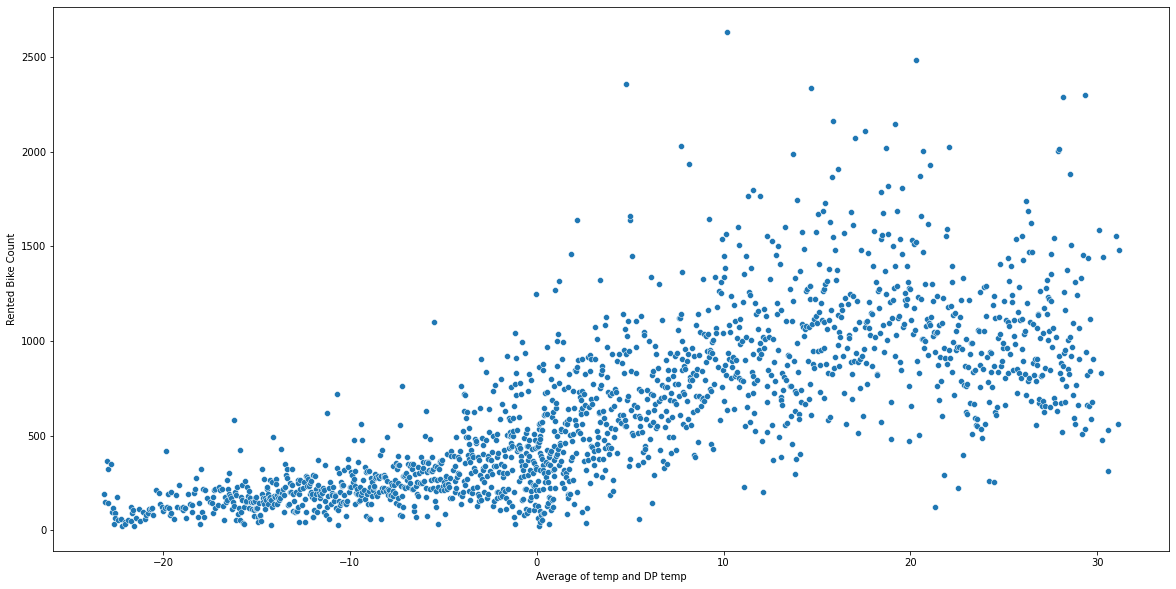

In [ ]:
#Observing the variation of the demand wrt Temperature
tempdf=df.groupby(['Average of temp and DP temp'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.scatterplot(data=tempdf,x='Average of temp and DP temp',y='Rented Bike Count',)

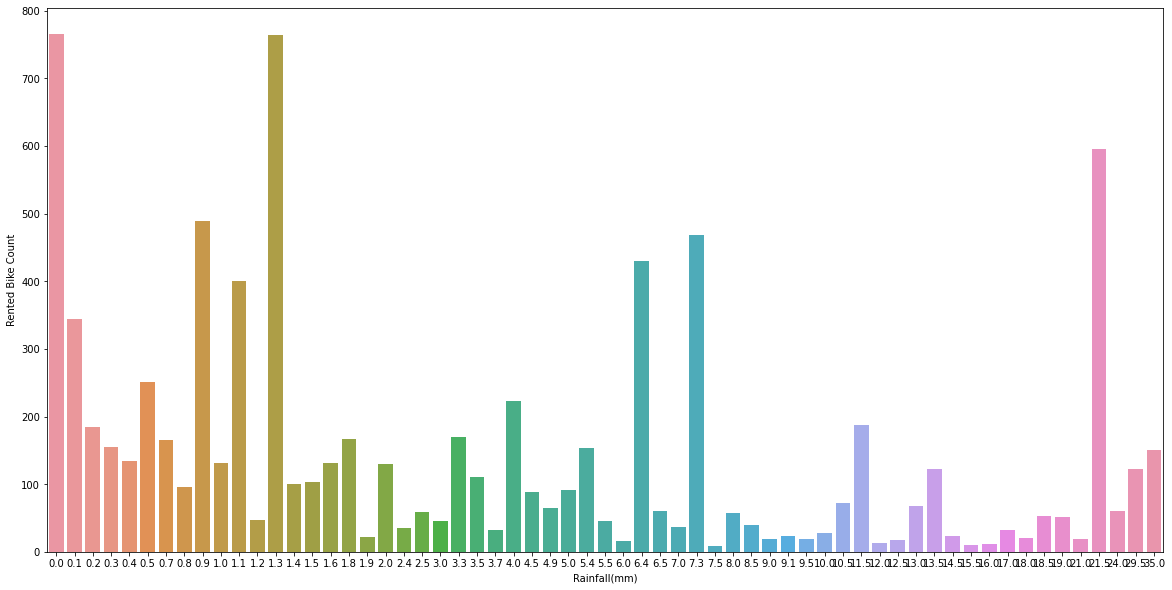

In [ ]:
#Observing the variation of the demand wrt Temperature
raindf=df.groupby(['Rainfall(mm)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=raindf,x='Rainfall(mm)',y='Rented Bike Count',)

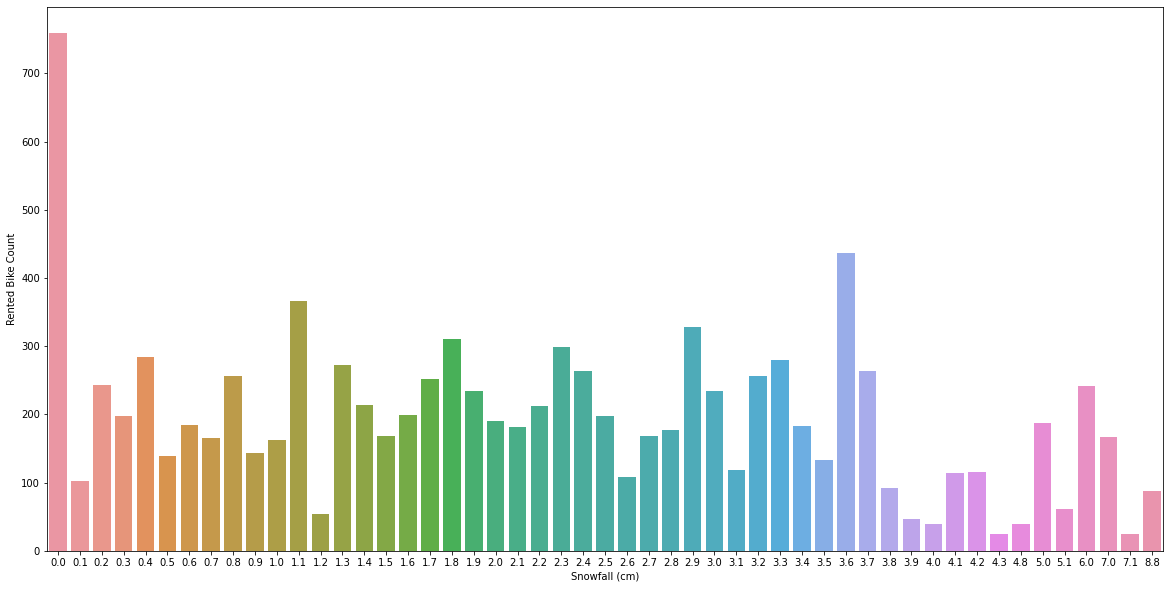

In [ ]:
#Observing the variation of the demand wrt Snowfall
snowdf=df.groupby(['Snowfall (cm)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=snowdf,x='Snowfall (cm)',y='Rented Bike Count',)

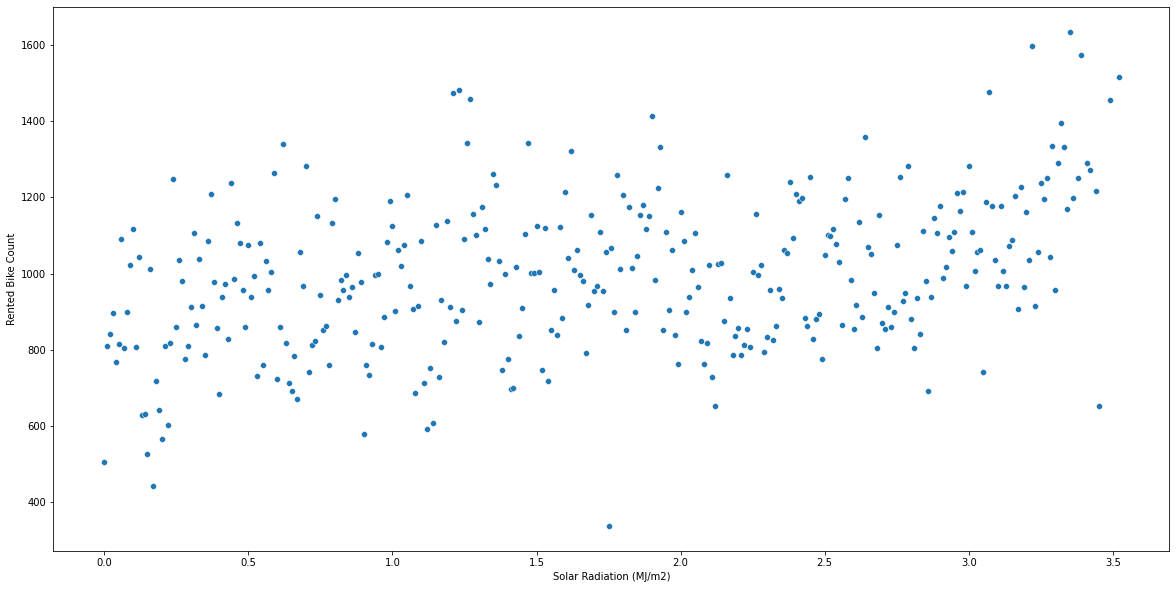

In [ ]:
#Observing the variation of the demand wrt Snowfall
srdf=df.groupby(['Solar Radiation (MJ/m2)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.scatterplot(data=srdf,x='Solar Radiation (MJ/m2)',y='Rented Bike Count',)

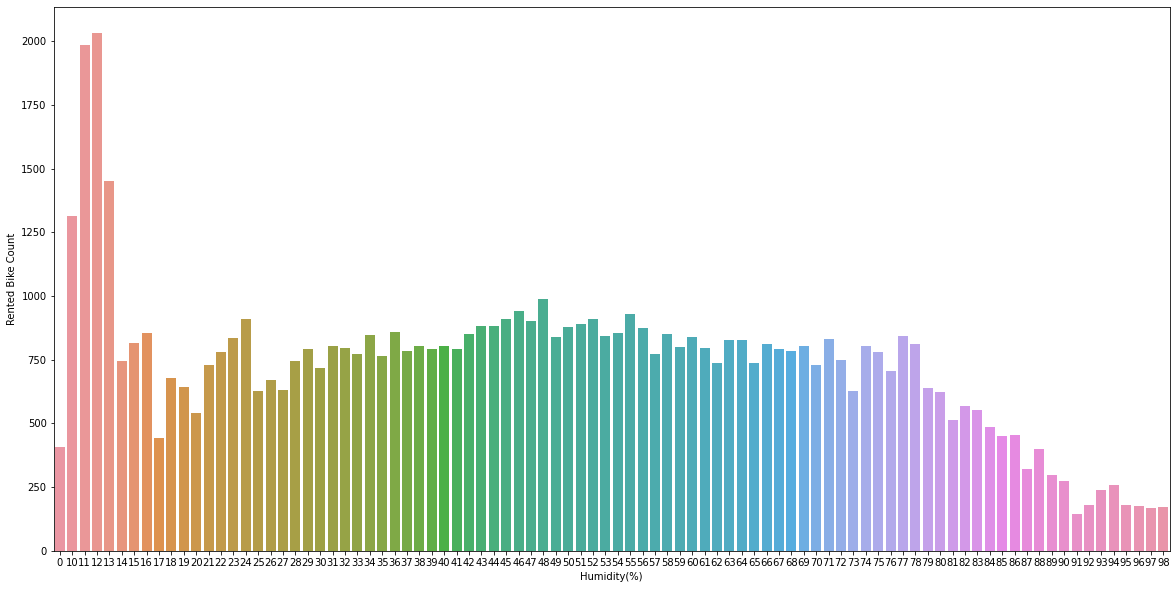

In [ ]:
#Observing the variation of the demand wrt Snowfall
humdf=df.groupby(['Humidity(%)'],as_index=False)['Rented Bike Count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(data=humdf,x='Humidity(%)',y='Rented Bike Count')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

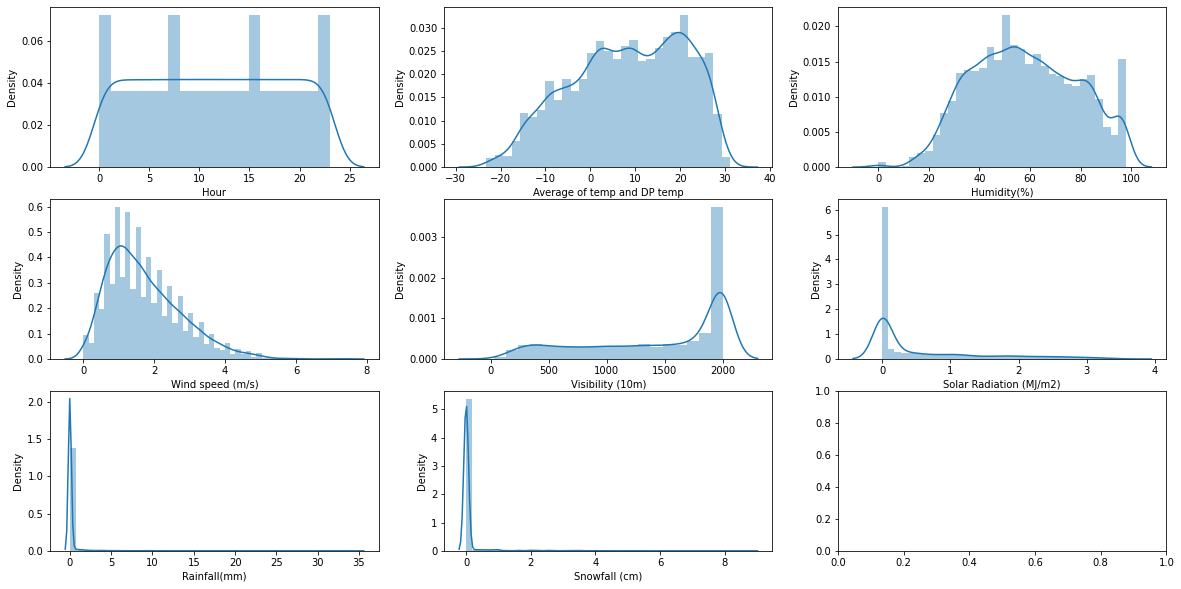

In [ ]:
#Looking at the distribution plots for various variables
fig,axes=plt.subplots(3,3,figsize=(20,10))
sns.distplot(df['Hour'],kde=True,ax=axes[0,0])
sns.distplot(df['Average of temp and DP temp'],kde=True,ax=axes[0,1])
sns.distplot(df['Humidity(%)'],kde=True,ax=axes[0,2])
sns.distplot(df['Wind speed (m/s)'],kde=True,ax=axes[1,0])
sns.distplot(df['Visibility (10m)'],kde=True,ax=axes[1,1])
sns.distplot(df['Solar Radiation (MJ/m2)'],kde=True,ax=axes[1,2])
sns.distplot(df['Rainfall(mm)'],kde=True,ax=axes[2,0])
sns.distplot(df['Snowfall (cm)'],kde=True,ax=axes[2,1])


# Probability Plot

The probability plot (P-P) is derived from the idea of Q–Q plots, which measures the agreement of a fitted distribution with observed data and which is sometimes used as a means of fitting a distribution to data.

In [ ]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [ ]:
def diagnostic_plot(data,variable):
  
  
  plt.figure(figsize=(15,6))
  plt.subplot(1,2,1)
  data[variable].hist()
  plt.title(variable)
  
 
  plt.subplot(1,2,2)
  stats.probplot(data[variable],dist='norm',plot=plt)
  plt.show()



In [ ]:
def plot_features(data,list):
  for i in list:
    plot=diagnostic_plot(data,i)
  return plot

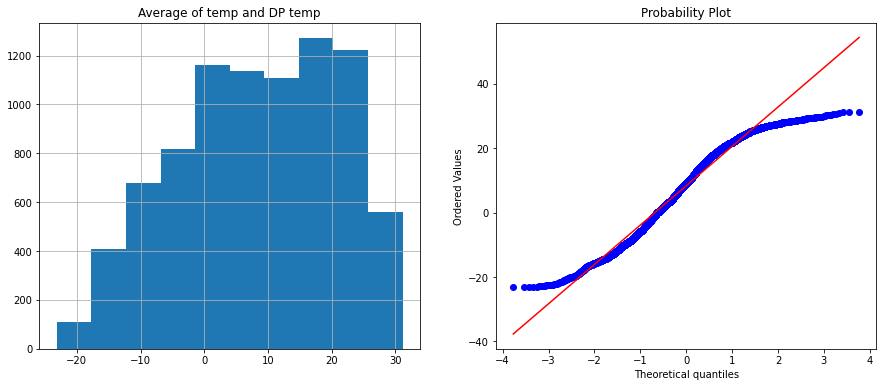

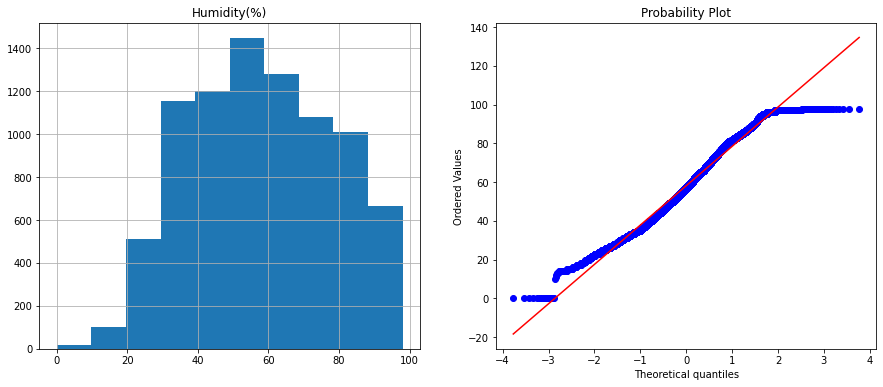

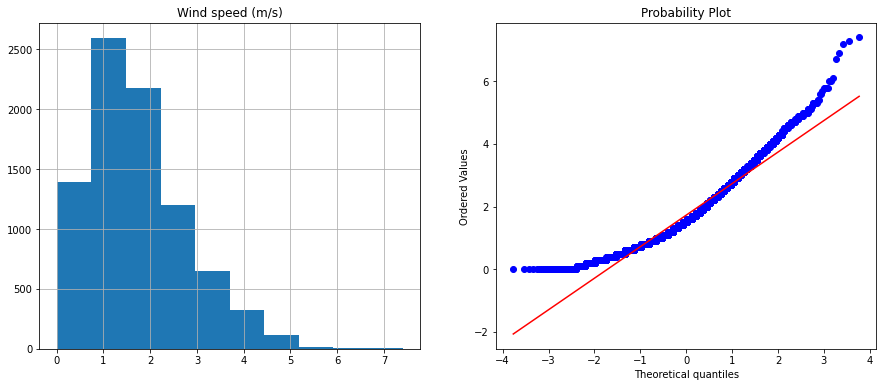

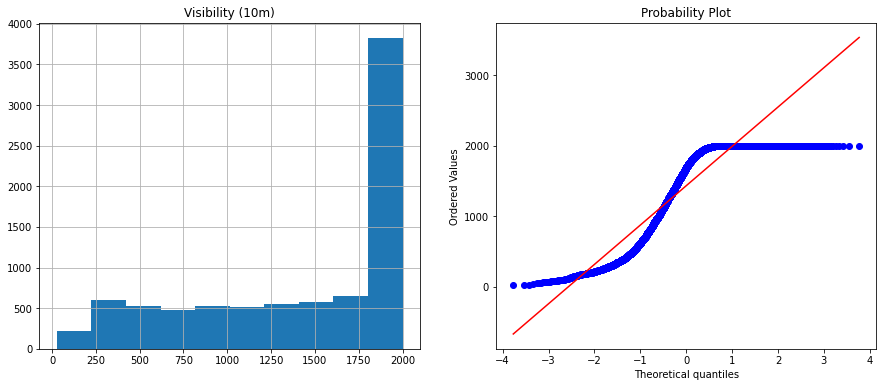

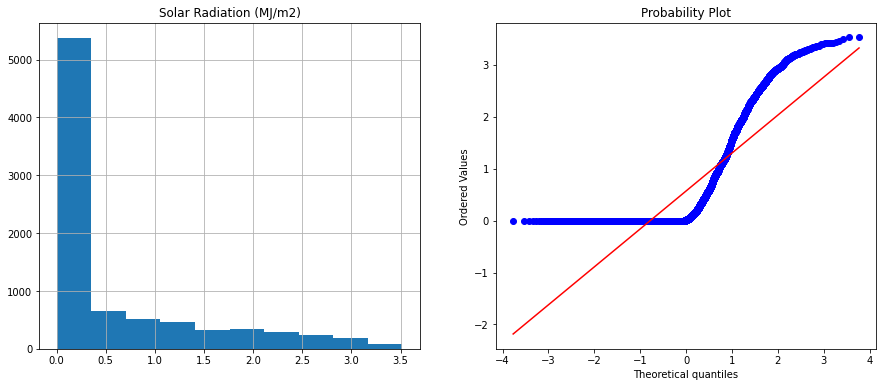

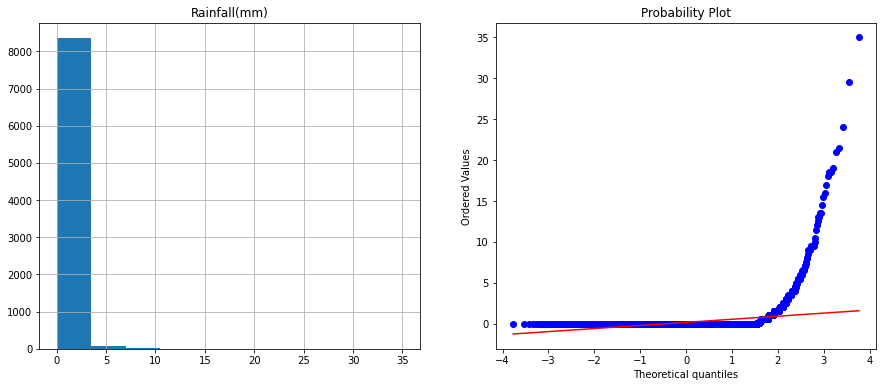

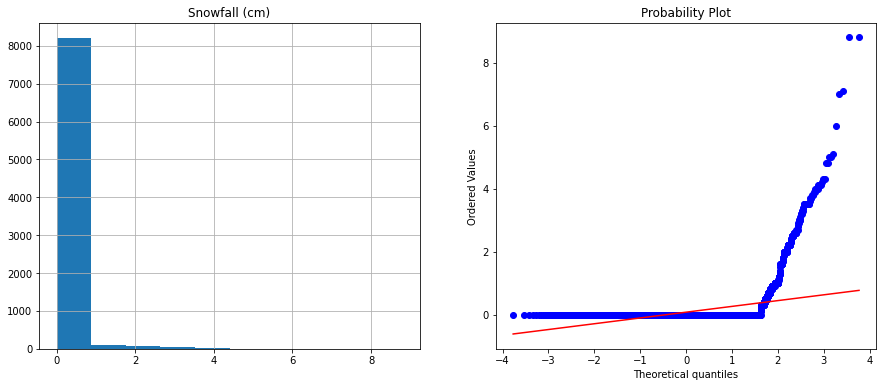

In [ ]:
feature_list=['Average of temp and DP temp','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
plot_features(df,feature_list)

We can try to transform the data to make it close to a Gaussian Distribution.

In [ ]:
#Trying out different transformations
df1=df.copy()

In [ ]:
#Square Root Transformations
for i in feature_list:
  df1['sqrt_'+i]=(df1[i])**1/2

In [ ]:
sqrt_list=[]
for i in feature_list:
  sqrt_list.append('sqrt_'+i)
sqrt_list


['sqrt_Average of temp and DP temp',
 'sqrt_Humidity(%)',
 'sqrt_Wind speed (m/s)',
 'sqrt_Visibility (10m)',
 'sqrt_Solar Radiation (MJ/m2)',
 'sqrt_Rainfall(mm)',
 'sqrt_Snowfall (cm)']

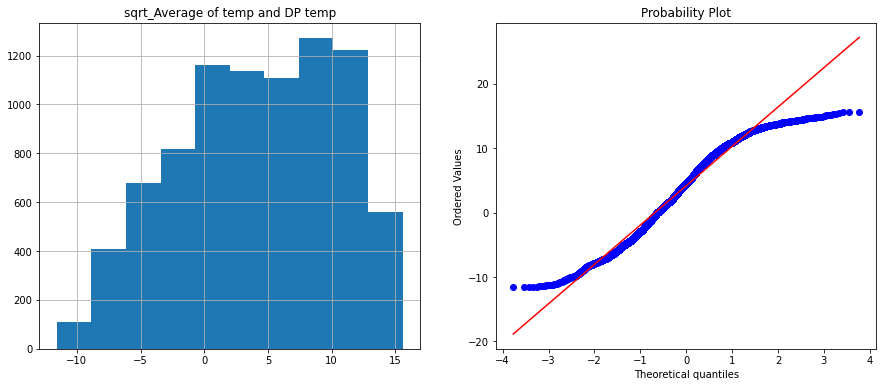

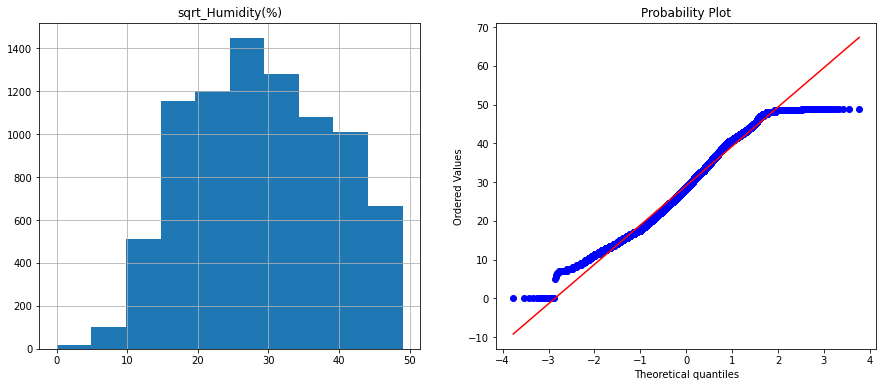

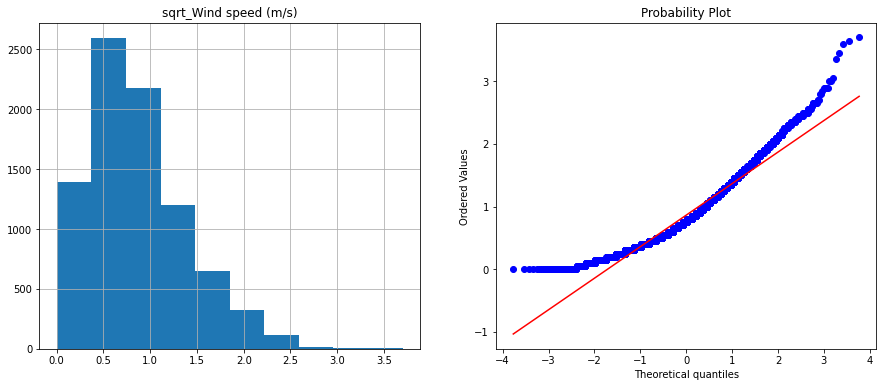

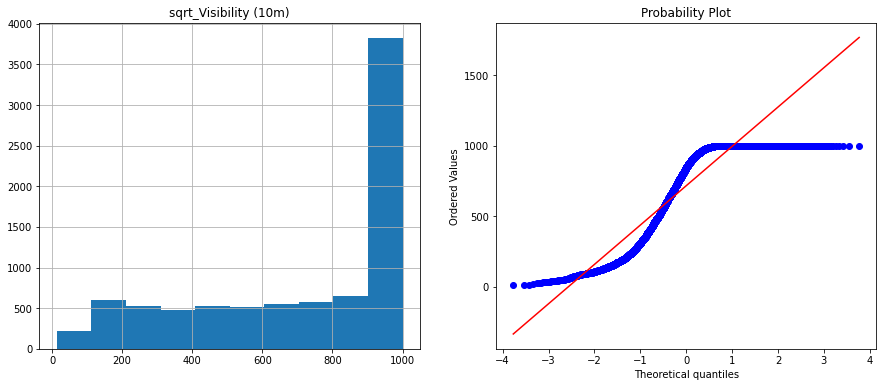

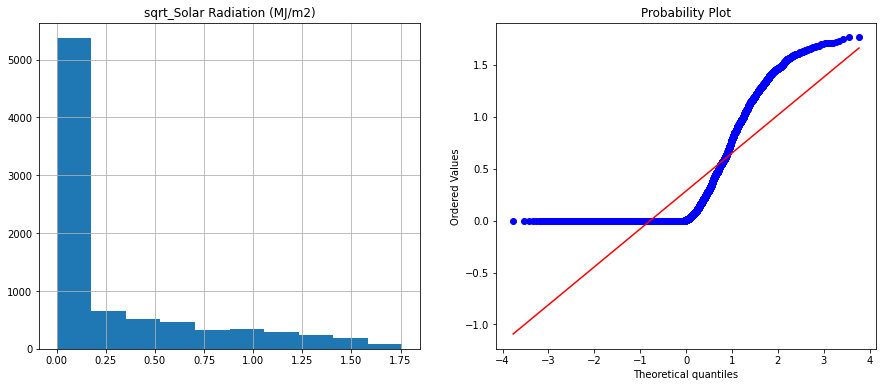

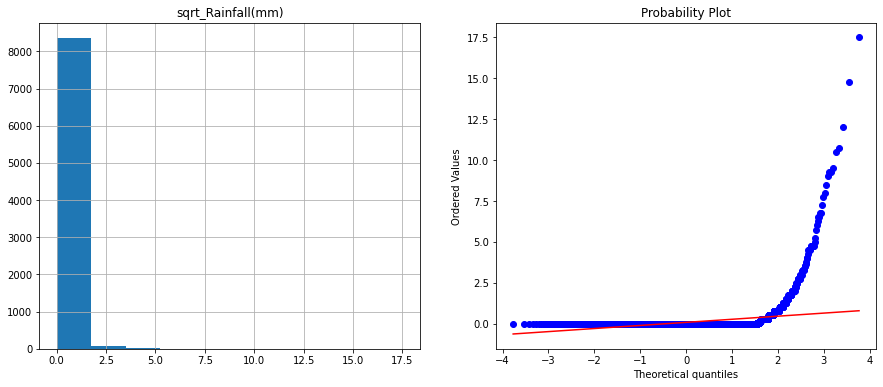

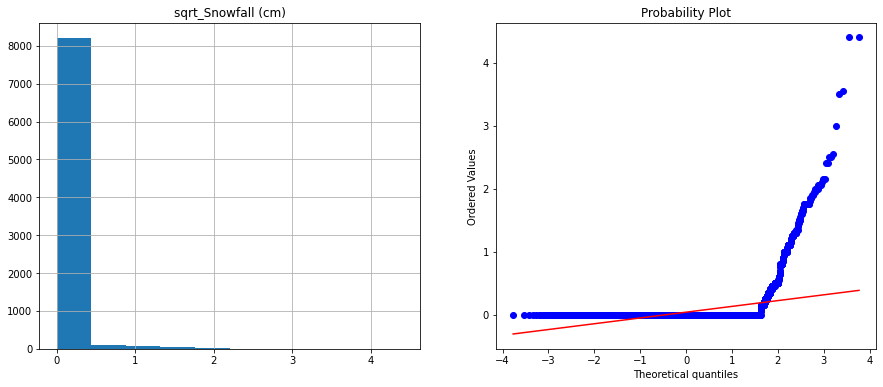

In [ ]:
plot_features(df1,sqrt_list)

In [ ]:
#Exponential Transformations
for i in feature_list:
  df1['ex_'+i]=(df1[i])**1/5

In [ ]:
ex_list=[]
for i in feature_list:
  ex_list.append('ex_'+i)
ex_list


['ex_Average of temp and DP temp',
 'ex_Humidity(%)',
 'ex_Wind speed (m/s)',
 'ex_Visibility (10m)',
 'ex_Solar Radiation (MJ/m2)',
 'ex_Rainfall(mm)',
 'ex_Snowfall (cm)']

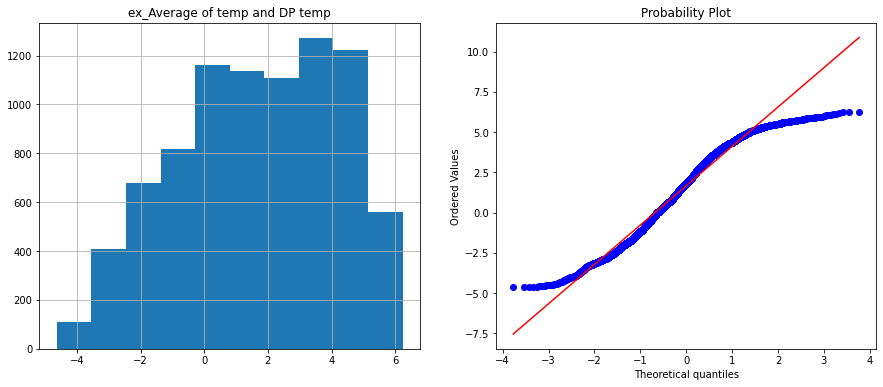

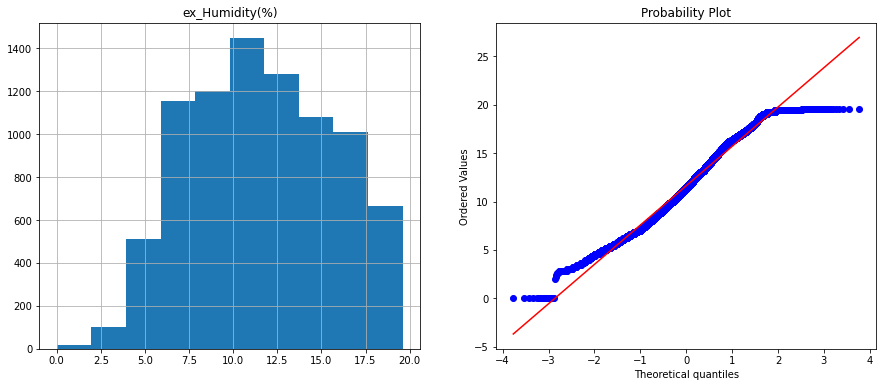

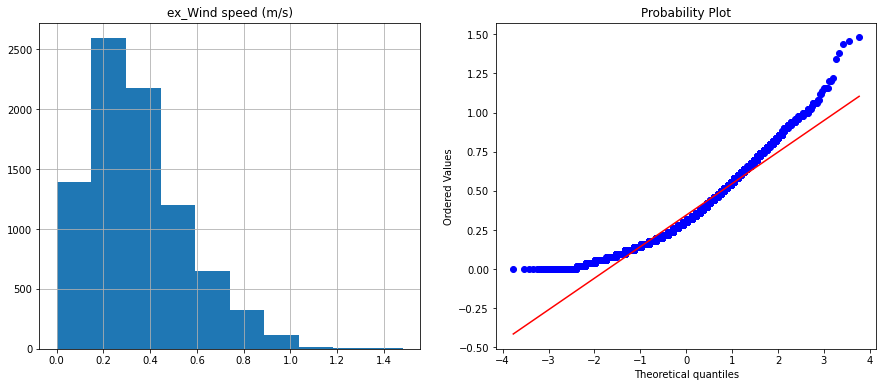

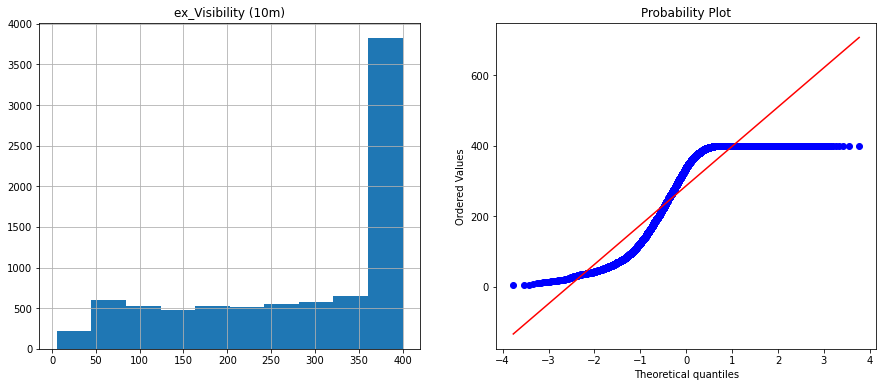

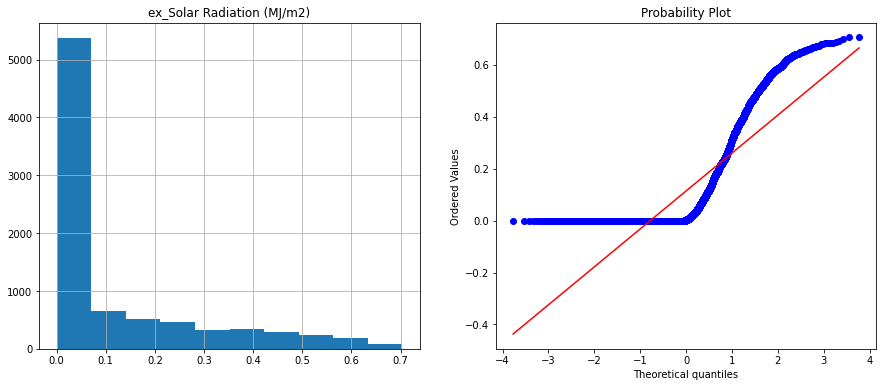

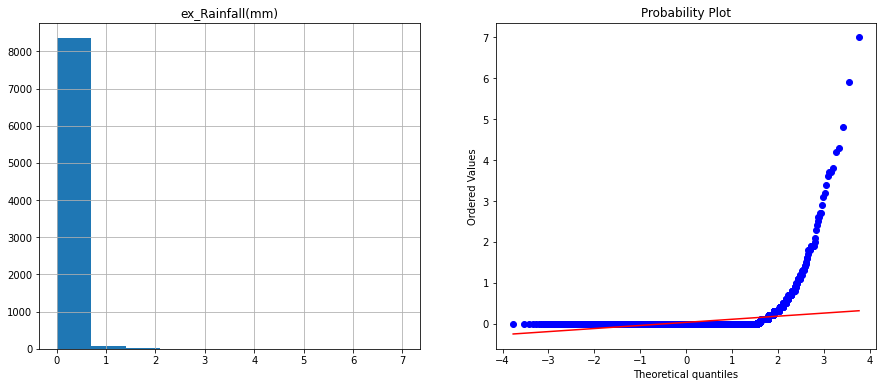

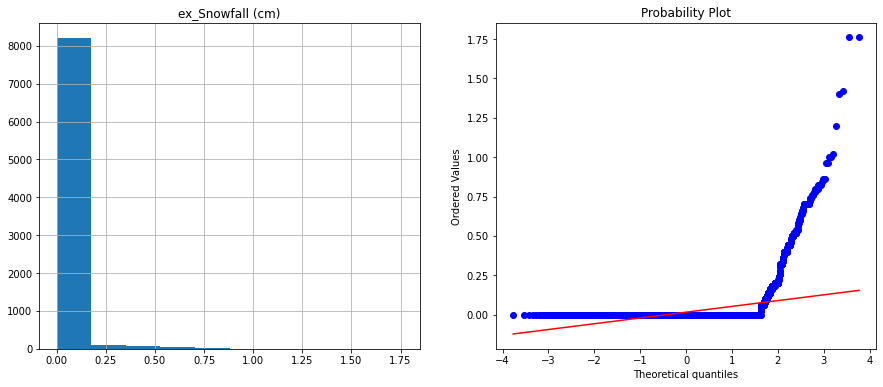

In [ ]:
plot_features(df1,ex_list)

We observe that the transformations don't change the distribution considerably. So we conclude that there is no need for any transformation in the variables.

In [ ]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5015efcc40>,
      dtype=object)

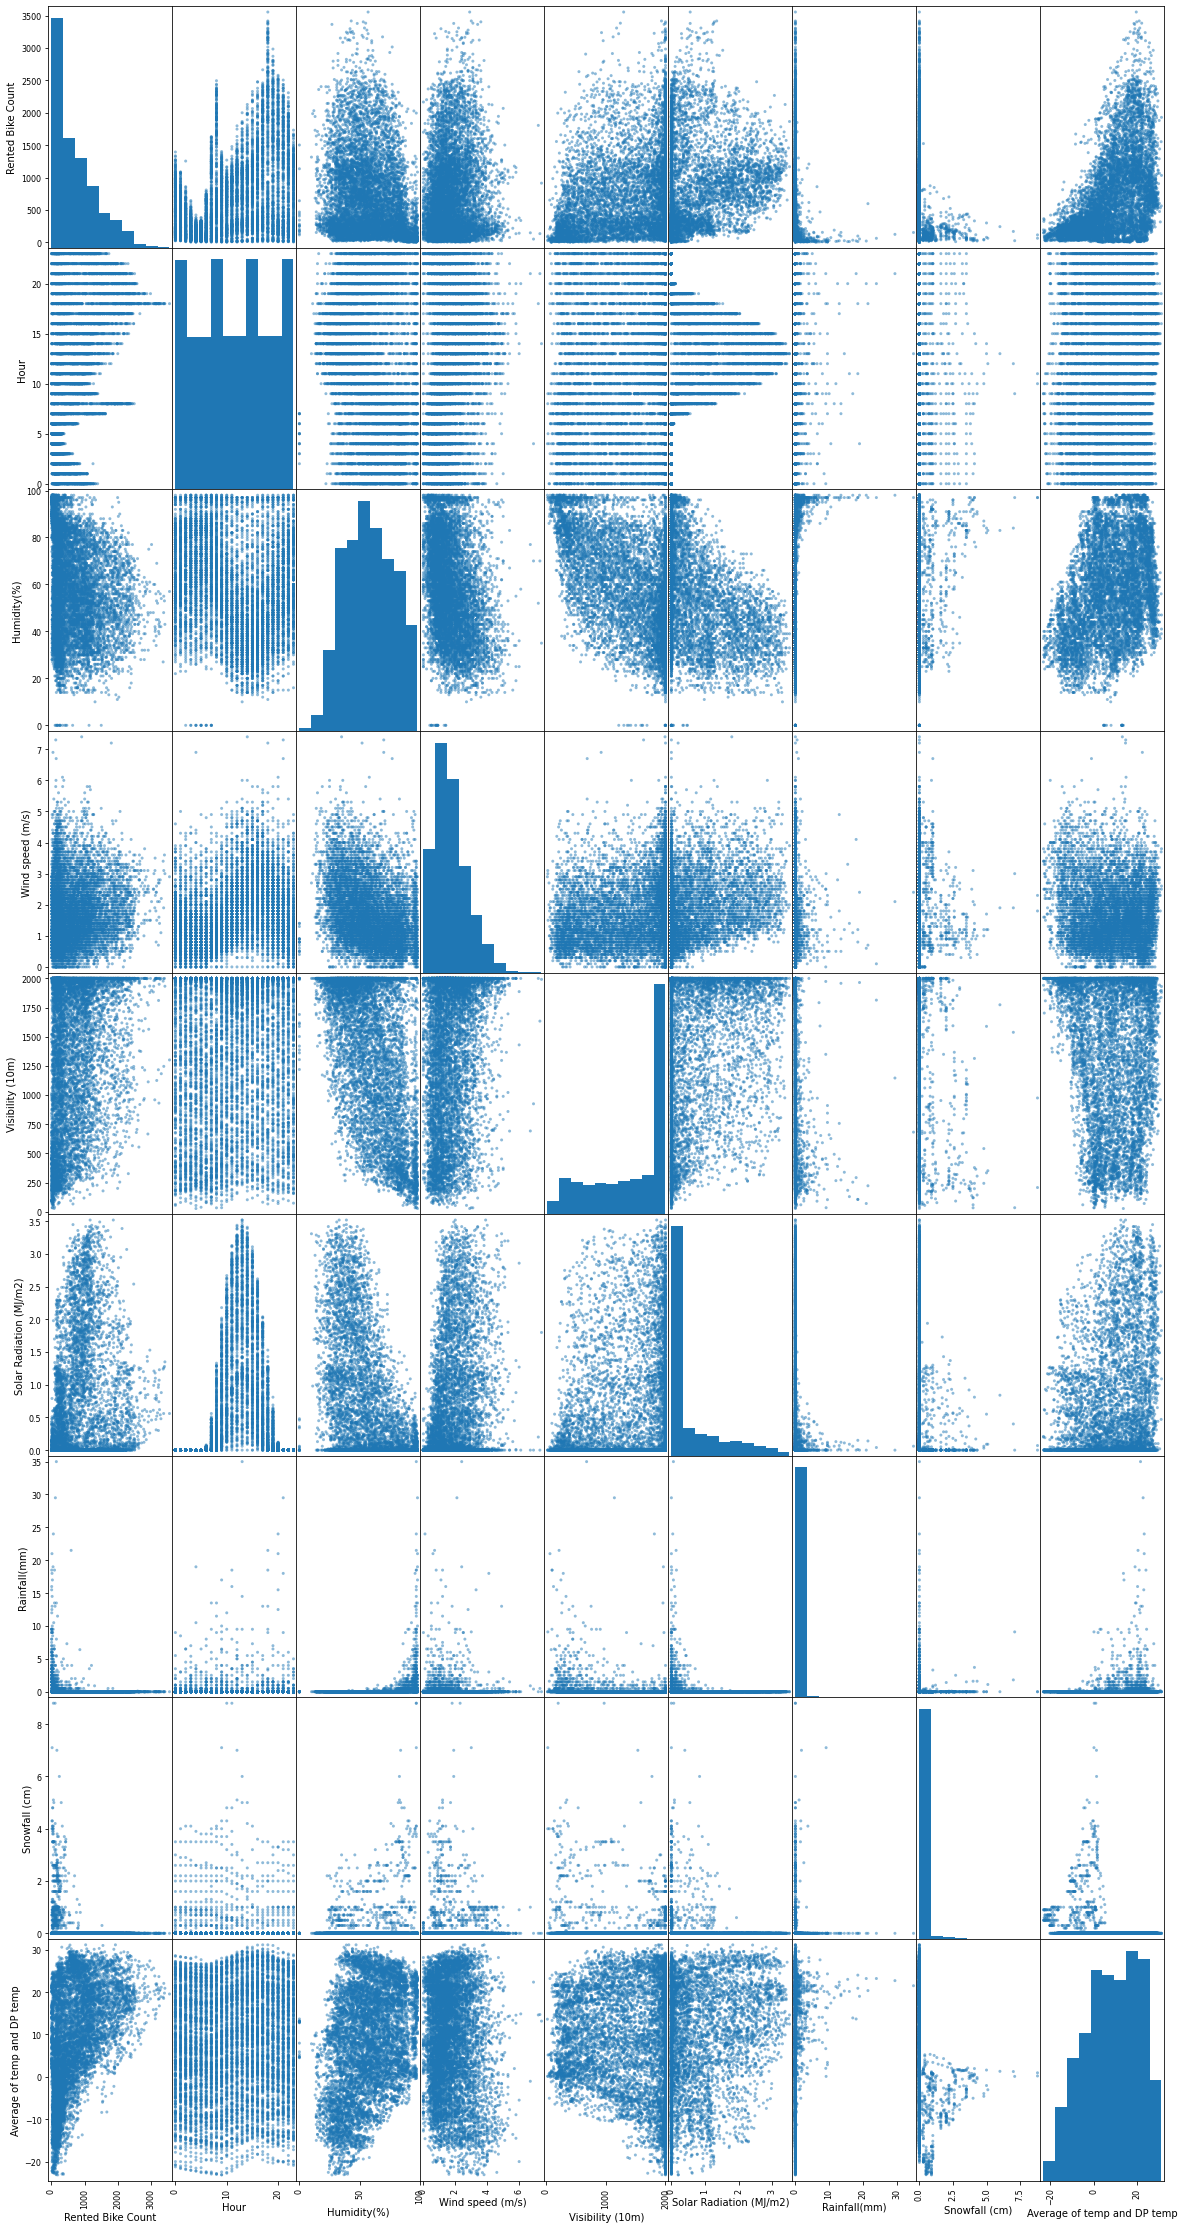

In [ ]:
scatter_matrix(df,figsize=(20,40))

## Outlier Detection

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

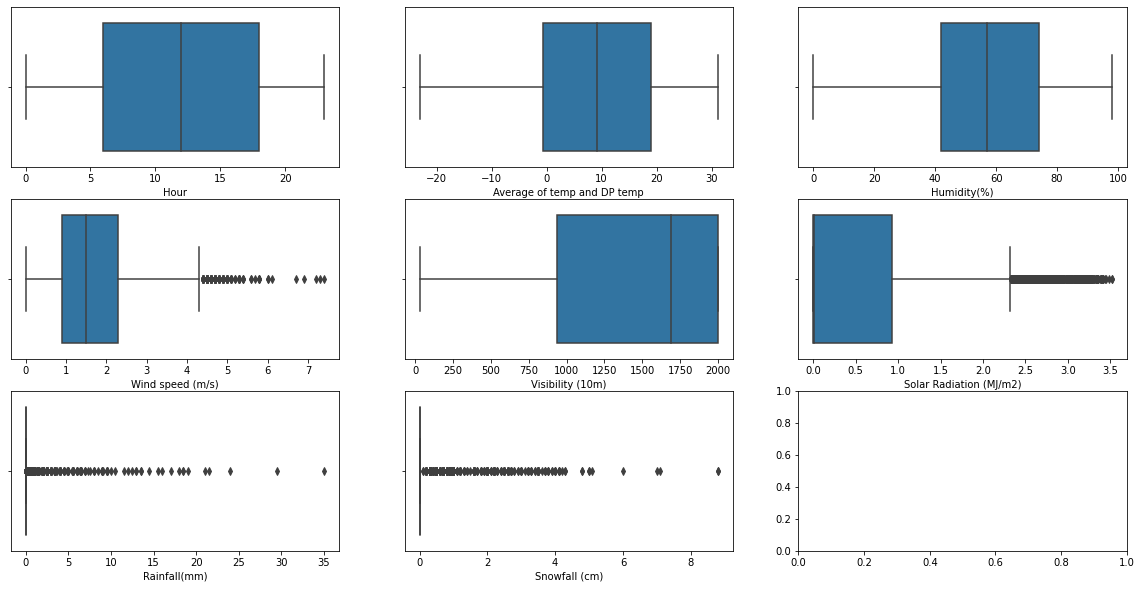

In [ ]:
#Looking at the box plots for various variables to observe outliers
fig,axes=plt.subplots(3,3,figsize=(20,10))
sns.boxplot(df['Hour'],ax=axes[0,0])
sns.boxplot(df['Average of temp and DP temp'],ax=axes[0,1])
sns.boxplot(df['Humidity(%)'],ax=axes[0,2])
sns.boxplot(df['Wind speed (m/s)'],ax=axes[1,0])
sns.boxplot(df['Visibility (10m)'],ax=axes[1,1])
sns.boxplot(df['Solar Radiation (MJ/m2)'],ax=axes[1,2])
sns.boxplot(df['Rainfall(mm)'],ax=axes[2,0])
sns.boxplot(df['Snowfall (cm)'],ax=axes[2,1])


We can now try to remove the outliers from different variables.

In [ ]:
Q1=df['Wind speed (m/s)'].quantile(0.25)
Q3=df['Wind speed (m/s)'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1.1999999999999997, 4.3999999999999995)

In [ ]:
df=df[(df['Wind speed (m/s)']>lower_limit)&(df['Wind speed (m/s)']<upper_limit)]

In [ ]:
Q1_SR=df['Solar Radiation (MJ/m2)'].quantile(0.25)
Q3_SR=df['Solar Radiation (MJ/m2)'].quantile(0.75)
IQR_SR=Q3_SR-Q1_SR
lower_limit_SR=Q1_SR-1.5*IQR_SR
upper_limit_SR=Q3_SR+1.5*IQR_SR
lower_limit_SR,upper_limit_SR

(-1.35, 2.25)

In [ ]:
df=df[(df['Solar Radiation (MJ/m2)']>lower_limit_SR)&(df['Solar Radiation (MJ/m2)']<upper_limit_SR)]

In [ ]:
Q1_R=df['Rainfall(mm)'].quantile(0.25)
Q3_R=df['Rainfall(mm)'].quantile(0.75)
IQR_R=Q3_R-Q1_R
lower_limit_R=Q1_R-1.5*IQR_R
upper_limit_R=Q3_R+1.5*IQR_R
lower_limit_R,upper_limit_R

(0.0, 0.0)

In [ ]:
df.shape


(7638, 12)

Observing the correlation among the variables.

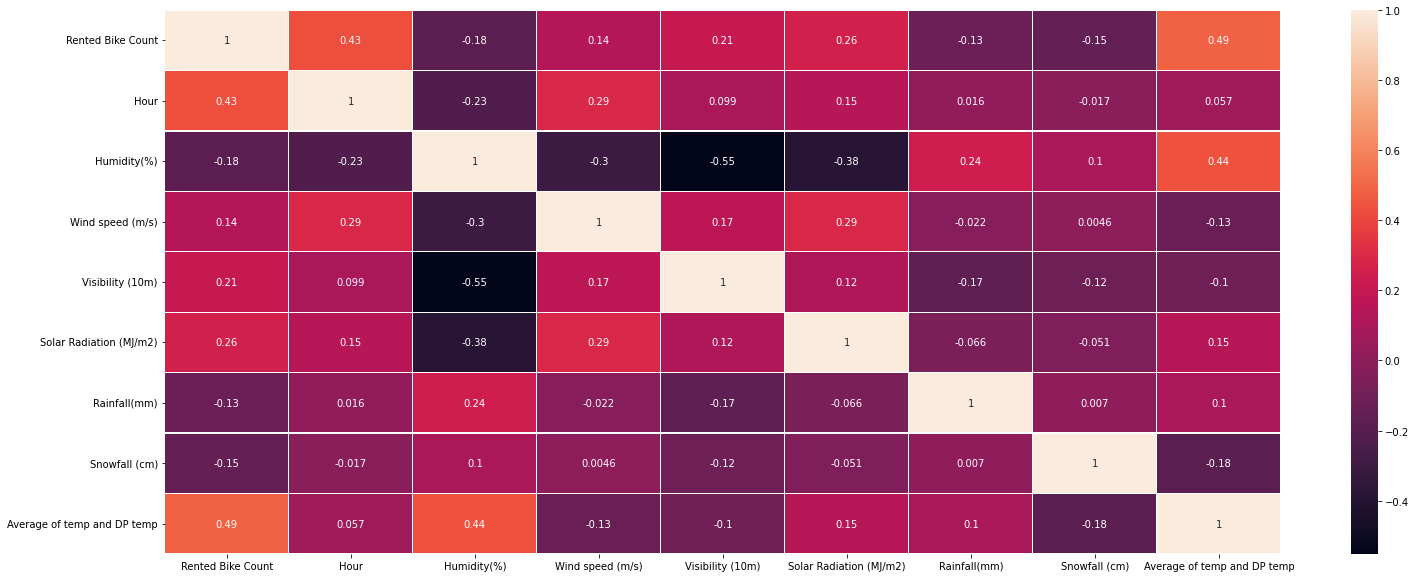

In [ ]:
plt.rcParams['figure.figsize']=(25,10)
sns.heatmap(df.corr(method='pearson'),linewidth=0.2,annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

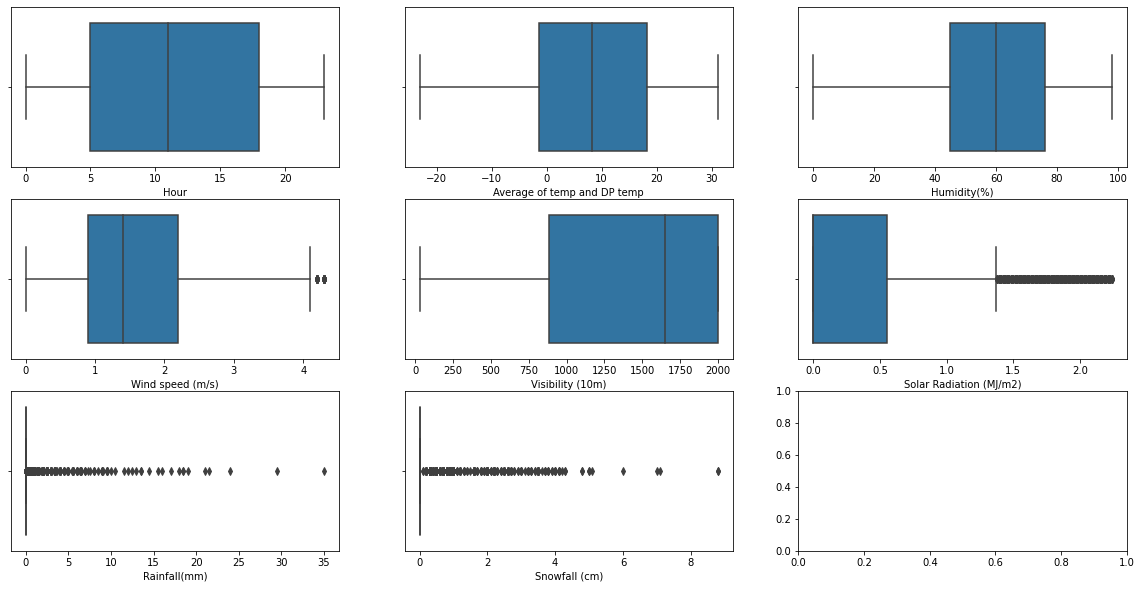

In [ ]:
#Now lets observe the variables after removing outliers.
fig,axes=plt.subplots(3,3,figsize=(20,10))
sns.boxplot(df['Hour'],ax=axes[0,0])
sns.boxplot(df['Average of temp and DP temp'],ax=axes[0,1])
sns.boxplot(df['Humidity(%)'],ax=axes[0,2])
sns.boxplot(df['Wind speed (m/s)'],ax=axes[1,0])
sns.boxplot(df['Visibility (10m)'],ax=axes[1,1])
sns.boxplot(df['Solar Radiation (MJ/m2)'],ax=axes[1,2])
sns.boxplot(df['Rainfall(mm)'],ax=axes[2,0])
sns.boxplot(df['Snowfall (cm)'],ax=axes[2,1])


We can extract day month and year from the Date variable.

In [ ]:
#Converting the Date column to datetime format
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#Extracting month from date
date_list=list(df['Date'])
month=[i.month for i in date_list]
len(month)

7638

In [ ]:
#Extracting weekday from date
weekday=[i.weekday() for i in date_list]
weekday

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,


In [ ]:
#Assigning month names to the months
month_names_list=['None','Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']
month_names=[j for i in month for j in month_names_list if i==month_names_list.index(j)]
month_names

['Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'June',
 'June',
 'June',
 'June',
 'June',
 'June',
 'June',
 'June',
 'June',
 'June',
 'June',
 'Jun

In [ ]:
#Assigning weekday names to weekday
day_name_list=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
day_names=[j for i in weekday for j in day_name_list if i==day_name_list.index(j)]
len(day_names)

7638

In [ ]:
df['Day of Week']=day_names
df['Month']=month_names
df['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
8755    Nov
8756    Nov
8757    Nov
8758    Nov
8759    Nov
Name: Month, Length: 7638, dtype: object

## One Hot Encoding

In [ ]:
holiday=pd.get_dummies(df['Holiday'],drop_first=True)
days=pd.get_dummies(df['Day of Week'],drop_first=True)
months=pd.get_dummies(df['Month'],drop_first=True)
seasons=pd.get_dummies(df['Seasons'],drop_first=True)

In [ ]:
df=pd.concat([df,seasons,days,months,holiday],axis=1)

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,...,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,No Holiday
0,2017-01-12,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
1,2017-01-12,204,1,38,0.8,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
2,2017-01-12,173,2,39,1.0,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
3,2017-01-12,107,3,40,0.9,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1
4,2017-01-12,78,4,36,2.3,2000,0.0,0.0,0.0,Winter,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
#Dropping some unneeded variables and some variables that have  considerably high correlation with other variables
df=df.drop(['Date','Holiday','Wind speed (m/s)','Sep','Seasons','Day of Week','Month'],axis=1)

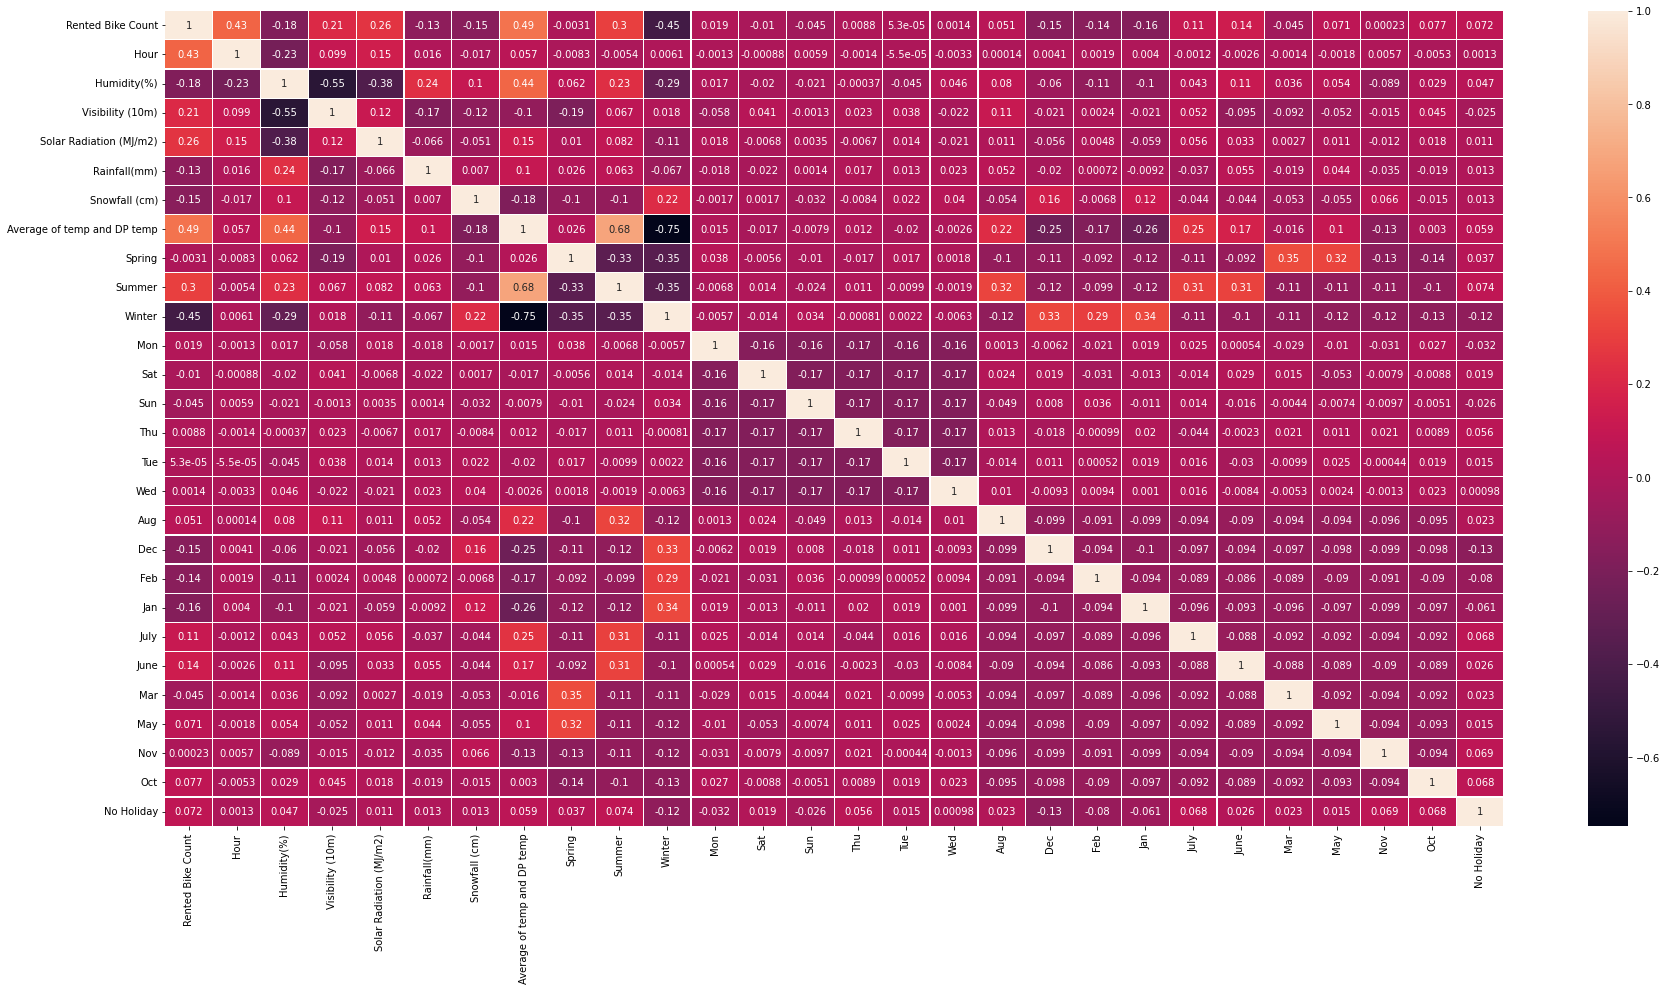

In [ ]:
plt.rcParams['figure.figsize']=(30,15)
sns.heatmap(df.corr(method='pearson'),linewidth=0.2,annot=True)

## Model Training

In [ ]:
#Splitting the dataset into train and test dataset
X=df.drop(['Rented Bike Count'],axis=1)
Y=df['Rented Bike Count']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
#Scaling the train and test dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Let us define functions for the evaluation of the models

In [ ]:
#Function for calculating Adjusted r2 scores
def adjr2_tr(y_pred_train):
  adjr2tr=1-(1-(r2(Y_train,y_pred_train))*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1))
  return adjr2tr
def adjr2_test(y_pred_test):
  adjr2test=1-(1-(r2(Y_test,y_pred_test))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
  return adjr2test

In [ ]:
def evaluation_metrics(y_pred_train,y_pred_test):
  #Printing train metrics
  print("TRAIN METRICS")
  print("Train r2 score: ",r2(Y_train,y_pred_train))
  print("Train MSE: ",mse(Y_train,y_pred_train))
  print("Train MAE: ",mae(Y_train,y_pred_train))
  print('Train Adjusted r2: ',adjr2_tr(y_pred_train))
  print('-'*40)
  #Printing test metrics
  print("TEST METRICS")
  print("Test r2 score: ",r2(Y_test,y_pred_test))
  print("Test MSE: ",mse(Y_test,y_pred_test))
  print("Test MAE: ",mae(Y_test,y_pred_test))
  print('Test Adjusted r2: ',adjr2_test(y_pred_test))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae



## Linear Regression

### Training and Implementation

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred_train_lr=lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)

### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_lr,y_pred_test_lr)


TRAIN METRICS
Train r2 score:  0.5653628713573693
Train MSE:  186418.9037407349
Train MAE:  326.83178860381923
Train Adjusted r2:  0.5678727032427111
----------------------------------------
TEST METRICS
Test r2 score:  0.5696672136614418
Test MSE:  189441.29689227676
Test MAE:  326.5216914749386
Test Adjusted r2:  0.5799212235073478


## Decision Tree Regressor

### Training and Evaluation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
dr.score(X_test,Y_test)

0.8228552123067607

In [ ]:
y_pred_train_dr=dr.predict(X_train)
y_pred_test_dr=dr.predict(X_test)

### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_dr,y_pred_test_dr)

TRAIN METRICS
Train r2 score:  1.0
Train MSE:  0.0
Train MAE:  0.0
Train Adjusted r2:  1.004439329168037
----------------------------------------
TEST METRICS
Test r2 score:  0.8228552123067607
Test MSE:  77982.75981675393
Test MAE:  162.03337696335078
Test Adjusted r2:  0.8376666061282825


# XG Boost Regressor

### Training and Implementation

In [ ]:

from xgboost import XGBRegressor
xg=XGBRegressor()




### Hyperparameter Tuning

In [ ]:
params={
    'n_estimators':[500,1000,1500,2000],
    'max_depth':[6,8,10,15,20],
    'learning_rate':[1e-4,1e-3,1e-2,0.1,0.3,1],
    'objective':['reg:squarederror']
}
clf_xgb=HalvingGridSearchCV(xg,params,cv=5,return_train_score=False)
clf_xgb.fit(X_train,Y_train)
print('best_score: ',clf_xgb.best_score_)
print('best_params: ',clf_xgb.best_params_)

KeyboardInterrupt: ignored

In [ ]:
#Applying all the hyperparameters obtained from hyperparameter tuning
xg=XGBRegressor(n_estimators=5000,objective='reg:squarederror',max_depth=8,learning_rate=0.01)

xgb=xg.fit(X_train,Y_train)

In [ ]:
y_pred_test_xgb=xgb.predict(X_test)
y_pred_train_xgb=xgb.predict(X_train)


### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_xgb,y_pred_test_xgb)

# Ridge Regression

### Training and Implementation

In [ ]:

from sklearn.linear_model import Ridge
rd=Ridge()


### Hyperparameter tuning

In [ ]:
params={
    'alpha':[0.5,0.1,0.01,0.001,0.0001],
    'solver':['svd','lsqr','saga'],
    'max_iter':[100,200,300,1000,2000,5000]
  
    
}
clf_rd=HalvingGridSearchCV(rd,params,cv=5,return_train_score=False)
clf_rd.fit(X_train,Y_train)
print('best_score: ',clf_rd.best_score_)
print('best_params: ',clf_rd.best_params_)


In [ ]:
rd=Ridge(alpha=0.5,max_iter=1000,solver='saga')
rd.fit(X_train,Y_train)


In [ ]:
y_pred_train_rd=rd.predict(X_train)
y_pred_test_rd=rd.predict(X_test)

### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_rd,y_pred_test_rd)

# Random Forest Regressor

### Training and Implementation

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor(n_estimators=1000,max_depth=30)
rfr.fit(X_train,Y_train)
rfr.score(X_test,Y_test)

In [ ]:
y_pred_train_rf=rfr.predict(X_train)
y_pred_test_rf=rfr.predict(X_test)

### Evaluation

In [ ]:
evaluation_metrics(y_pred_train_rf,y_pred_test_rf)

# Summary of the model performances

In [ ]:
#Creating a dataframe of all the model performances to choose the optimum model
train_scores=pd.DataFrame({'Model':['Linear Regression','Decision Tree Regressor','XGBoost Regressor','Ridge Regression','Random Forest Regressor'],
                           'r2 scores':[r2(Y_train,y_pred_train_lr),r2(Y_train,y_pred_train_dr),r2(Y_train,y_pred_train_xgb),r2(Y_train,y_pred_train_rd),r2(Y_train,y_pred_train_rf)],
                           'MSE':[mse(Y_train,y_pred_train_lr),mse(Y_train,y_pred_train_dr),mse(Y_train,y_pred_train_xgb),mse(Y_train,y_pred_train_rd),mse(Y_train,y_pred_train_rf)],
                           'MAE':[mae(Y_train,y_pred_train_lr),mae(Y_train,y_pred_train_dr),mae(Y_train,y_pred_train_xgb),mae(Y_train,y_pred_train_rd),mae(Y_train,y_pred_train_rf)],
                           'Adjusted R2 Score':[adjr2_tr(y_pred_train_lr),adjr2_tr(y_pred_train_dr),adjr2_tr(y_pred_train_xgb),adjr2_tr(y_pred_train_rd),adjr2_tr(y_pred_train_rf)]
                                        })

In [ ]:
train_scores

,Model,r2 scores,MSE,MAE,Adjusted R2 Score
0,Linear Regression,0.565363,186418.903741,326.831789,0.567873
1,Decision Tree Regressor,1.000000,0.000000,0.000000,1.004439
2,XGBoost Regressor,0.999009,425.087624,13.008114,1.003444
3,Ridge Regression,0.565362,186419.117135,326.844134,0.567872
4,Random Forest Regressor,0.985955,6023.986314,46.844333,0.990332


In [ ]:
test_scores=pd.DataFrame({'Model':['Linear Regression','Decision Tree Regressor','XGBoost Regressor','Ridge Regression','Random Forest Regressor'],
                           'r2 scores':[r2(Y_test,y_pred_test_lr),r2(Y_test,y_pred_test_dr),r2(Y_test,y_pred_test_xgb),r2(Y_test,y_pred_test_rd),r2(Y_test,y_pred_test_rf)],
                           'MSE':[mse(Y_test,y_pred_test_lr),mse(Y_test,y_pred_test_dr),mse(Y_test,y_pred_test_xgb),mse(Y_test,y_pred_test_rd),mse(Y_test,y_pred_test_rf)],
                           'MAE':[mae(Y_test,y_pred_test_lr),mae(Y_test,y_pred_test_dr),mae(Y_test,y_pred_test_xgb),mae(Y_test,y_pred_test_rd),mae(Y_test,y_pred_test_rf)],
                           'Adjusted R2 Score':[adjr2_test(y_pred_test_lr),adjr2_test(y_pred_test_dr),adjr2_test(y_pred_test_xgb),adjr2_test(y_pred_test_rd),adjr2_test(y_pred_test_rf)]
                                        })

In [ ]:
test_scores

,Model,r2 scores,MSE,MAE,Adjusted R2 Score
0,Linear Regression,0.569667,189441.296892,326.521691,0.579921
1,Decision Tree Regressor,0.825895,76644.437827,163.397251,0.840761
2,XGBoost Regressor,0.924672,33160.722844,102.888839,0.941317
3,Ridge Regression,0.569656,189446.366527,326.540428,0.579910
4,Random Forest Regressor,0.901272,43462.133056,125.049523,0.917495


We see that among all the models, XGBoost Regressor has the best scores with an r2 score of 0.924 and adjusted r2 score of 0.94 on the test dataset. Thus we choose XG Boost to be our optimum model.